# Imports

In [1]:
from vpython import *
import numpy as np
import matplotlib.pyplot as pyplt
from copy import deepcopy
scene = canvas()
sphere()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Walker

## Confirming uniform distribution

<BarContainer object of 4 artists>

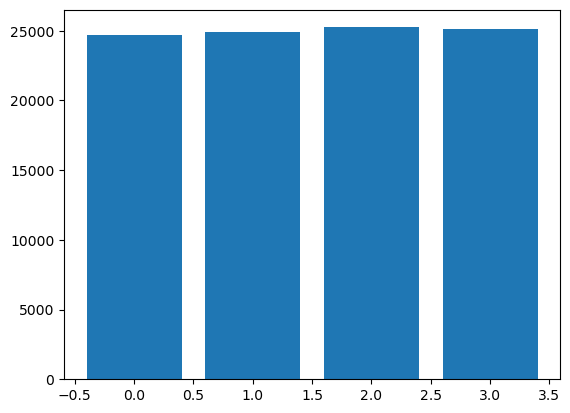

In [2]:
bins = np.arange(4)
numbers = np.random.randint(0, 4, (100000))
binSizes = np.zeros(4)
for num in numbers:
    binSizes[num]+=1
pyplt.bar(bins, binSizes)

We can see that with a large sample size, we get a uniform distribution of the random integers between 0 and 3. So this confirms that the np.random.randint function generates a uniform distribution

## Random Walker Simulation

### Definition

In [41]:
def simulateRandomWalker(numSteps=100, visualize=True):
    # if visualizing, setup vpython stuff and iteratively step through
    if visualize:
        if visualize:
            scene=canvas()
        pos = vec(0,0,0)
        dirs = [vec(1,0,0), vec(0,1,0), vec(-1,0,0), vec(0,-1,0)]

        t=0
        while t < numSteps:
            pos += dirs[np.random.randint(0, 4)]
            t+=1
            if visualize:
                cylinder(pos=pos, axis=vec(0,0,1), radius=0.4, length=0.01)
                rate(100)

        endpointRadius = mag(pos)
        return endpointRadius
    # if not visualizing, use numpy shenanigangs to drastically speed it up
    # these calculations are identical, it just generates numSteps number of indexes for the dirs array
    # and then adds them all together and gets that magnitude
    # Which is the same thing being done in the visualized version
    else:
        dirs = np.array([[1,0],[0,1],[-1,0],[0,-1]])
        stepDirs = np.random.randint(0, 4, numSteps)
        return np.linalg.norm(np.sum(dirs[stepDirs], axis=0))
    


### Visual Simulation

In [4]:
simulateRandomWalker(numSteps=500)

<IPython.core.display.Javascript object>

8.602325267042627

### Average Endpoint Radius

In [52]:
numSteps = 10000
expectedEndpointRadius = sqrt(numSteps)
numTrials = 1000

sumEndpointRadii = 0
for i in range(numTrials):
    sumEndpointRadii += simulateRandomWalker(numSteps=numSteps, visualize=False)
print("Num steps: " + str(numSteps))
print("Expected Endpoint Radius: " + str(sqrt(numSteps)))
print("Average Endpoint Radius: " + str(float(sumEndpointRadii)/float(numTrials)))

Num steps: 10000
Expected Endpoint Radius: 100.0
Average Endpoint Radius: 89.53894939253134


### Analysis
We can see that this is correct because the average endpoint radius is always around $sqrt(N)$ where N is the number of steps.

According to the wikipedia page that Dr. Bocan sourced for this project, the average endpoint radius is actually "on the order of square root N" and not exactly square root N. So if N is 100, the average endpoint radius shouldn't be exactly 10, it would be closer to 9

# 1D Cellular Automaton

## Definition

In [6]:
def simulate1dCellularAutomaton(rule=30, steps=10):
    scene = canvas()
    state = [0 for i in range(steps)] + [1] + [0 for i in range(steps)]
    t=0
    while t < steps+1:
        for i in range(len(state)):
            if state[i] == 1:
                cylinder(pos=vec(-steps+i, -t, 0), axis=vec(0,0,1), radius=0.5, length=0.01)
                
        state = nextState(state, rule)
        
        t += 1
        rate(12)

def nextState(state, rule):
    ruleList = [0 for i in range(0, 10-len(bin(rule)))]+[int(bin(rule)[i]) for i in range(2,len(bin(rule)))]
    nextState = [0 for i in range(len(state))]
    for i in range(len(state)):
        if i == 0:
            nextState[i] = ruleList[7-(state[i]*2+state[i+1])]
        if i == len(state)-1:
            nextState[i] = ruleList[7-(state[i-1]*4+state[i]*2)]
        else:
            nextState[i] = ruleList[7-(state[i-1]*4+state[i]*2+state[i+1])]
    return nextState

## Simulations
I chose these 4 rules from the wiki page because I thought they looked interesting and showed diversity/robustness of my implementation

In [7]:
simulate1dCellularAutomaton(rule=30, steps=30)
simulate1dCellularAutomaton(rule=61, steps=30)
simulate1dCellularAutomaton(rule=90, steps=30)
simulate1dCellularAutomaton(rule=182, steps=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conway's Game of Life

## Definition

In [2]:
stopSim = False
def endSim():
    global stopSim
    stopSim = True

def simulateGameOfLife(initialState=None, rows=100, cols=100):
    scene = canvas()
    endButton = button(text="End Sim", bind=endSim)
    if initialState == None:
        state = [[0 for i in range(cols)] for j in range(rows)]
        mid = int(rows/2)
        
        # r pentomino
        state[mid][mid] = 1
        state[mid][mid+1] = 1
        state[mid][mid-1] = 1
        state[mid-1][mid] = 1
        state[mid+1][mid+1] = 1
        
        # square still life
        # state[mid][mid] = 1
        # state[mid+1][mid+1] = 1
        # state[mid][mid+1] = 1
        # state[mid+1][mid] = 1
    else:
        state = initialState
        
    # create grid of cylinders for vpython visualization
    visualState = []
    for i in range(rows):
        visualState.append([])
        for j in range(cols):
            visualState[i].append(cylinder(pos=vec(-cols/2+i, -rows/2+j, 0), axis=vec(0,0,1), radius=0.5, length=0.01))
            visualState[i][j].visible = state[i][j]==1
    
    # create 4 outer "anchor" cylinders to make the camera zoom good
    cylinder(pos=vec(-cols/2-1, -rows/2-1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
    cylinder(pos=vec(cols/2+1, rows/2+1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
    cylinder(pos=vec(-cols/2-1, rows/2+1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
    cylinder(pos=vec(cols/2+1, -rows/2-1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
            
    t=0
    while not stopSim:
        
        # update grid of cylinders for vpython visualization
        for i in range(rows):
            for j in range(cols):
                visualState[i][j].visible = state[i][j]==1
                
        state = nextState(state, rows, cols)
        
        t += 1
        rate(30)
        # return

def nextState(state, rows, cols):
    nextState = [[0 for i in range(cols)] for j in range(rows)] 
    for i in range(rows):
        for j in range(cols):
            numAliveNeighbors = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    if k==0 and l==0:
                        continue
                    rowInd = i+k
                    colInd = j+l
                    # border condition checks
                    rowInd = rows-1 if rowInd < 0 else rowInd
                    rowInd = 0 if rowInd > rows-1 else rowInd
                    colInd = cols-1 if colInd < 0 else colInd
                    colInd = 0 if colInd > cols-1 else colInd
                    
                    numAliveNeighbors += state[rowInd][colInd]
                        
            if state[i][j] == 1:
                nextState[i][j] = 1 if numAliveNeighbors in [2,3] else 0
            else:
                nextState[i][j] = 1 if numAliveNeighbors == 3 else 0
    return nextState

## Simulation
I chose initial condition as the R-Pentomino because it creates a complex state that shows functionality of still lifes, oscillators, and gliders

In [3]:
simulateGameOfLife()

<IPython.core.display.Javascript object>

# Asynchronous Life

## Definition
Refactor the simualateGameOfLife and nextState functions to take synch/asynch as a parameter.

If I had more time I would implement random order and cyclic update schemes and make the parameter which scheme you want, instead of just synch vs asynch, but for now it's just synch vs random independent asynch.

In [30]:
stopSim = False
def endSim():
    global stopSim
    stopSim = True

def simulateGameOfLife(asynch=False, initialState=None, rows=100, cols=100, endTime=float('inf'), updatesPerFrame=1):
    global stopSim
    stopSim = False
    scene = canvas()
    endButton = button(text="End Sim", bind=endSim)
    if initialState == None:
        state = [[0 for i in range(cols)] for j in range(rows)]
        mid = int(rows/2)
        
        # r pentomino
        state[mid][mid] = 1
        state[mid][mid+1] = 1
        state[mid][mid-1] = 1
        state[mid-1][mid] = 1
        state[mid+1][mid+1] = 1
        
        # square still life
        # state[mid][mid] = 1
        # state[mid+1][mid+1] = 1
        # state[mid][mid+1] = 1
        # state[mid+1][mid] = 1
    else:
        state = initialState
        
    # create grid of cylinders for vpython visualization
    visualState = []
    for i in range(rows):
        visualState.append([])
        for j in range(cols):
            visualState[i].append(cylinder(pos=vec(-cols/2+i, -rows/2+j, 0), axis=vec(0,0,1), radius=0.5, length=0.01))
            visualState[i][j].visible = state[i][j]==1
    
    # create 4 outer "anchor" cylinders to make the camera zoom good
    cylinder(pos=vec(-cols/2-1, -rows/2-1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
    cylinder(pos=vec(cols/2+1, rows/2+1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
    cylinder(pos=vec(-cols/2-1, rows/2+1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
    cylinder(pos=vec(cols/2+1, -rows/2-1, 0), axis=vec(0,0,1), radius=0.5, length=0.01, color=vec(0,0,0))
            
    t=0
    while t < endTime and not stopSim:
        
        # update grid of cylinders for vpython visualization
        for i in range(rows):
            for j in range(cols):
                visualState[i][j].visible = state[i][j]==1
        
        for i in range(updatesPerFrame):
            state = nextState(state, rows, cols, asynch=asynch)
        
        t += 1
        rate(30)
        # return

def nextState(state, rows, cols, asynch=False):
    nextState = deepcopy(state)
    if asynch:
        rowIdx = np.random.randint(0, rows)
        colIdx = np.random.randint(0, cols)
        nextState[rowIdx][colIdx] = getNextCellState(state, rows, cols, rowIdx, colIdx)
    else:
        for i in range(rows):
            for j in range(cols):
                nextState[i][j] = getNextCellState(state, rows, cols, i, j)
    return nextState

def getNextCellState(state, rows, cols, i, j):
    numAliveNeighbors = 0
    for k in range(-1, 2):
        for l in range(-1, 2):
            if k==0 and l==0:
                continue
            rowInd = i+k
            colInd = j+l
            # border condition checks
            rowInd = rows-1 if rowInd < 0 else rowInd
            rowInd = 0 if rowInd > rows-1 else rowInd
            colInd = cols-1 if colInd < 0 else colInd
            colInd = 0 if colInd > cols-1 else colInd

            numAliveNeighbors += state[rowInd][colInd]

    if state[i][j] == 1:
        return 1 if numAliveNeighbors in [2,3] else 0
    else:
        return 1 if numAliveNeighbors == 3 else 0

## Simulation

Both the allAliveInitialState and randomInitialState I found are generally more interesting for asynch updating then the r-pentomino which is the default state for the synch updating.

But if you want to see the r-pentomino with asynch updating just set `initialState=None`

In [39]:
rows=10
cols=10
allAliveInitialState = [[1 for i in range(cols)] for j in range(rows)]
randomInitialState = [[np.random.randint(0,2) for i in range(cols)] for j in range(rows)]
simulateGameOfLife(asynch=True,initialState=allAliveInitialState, rows=rows, cols=cols, updatesPerFrame=10)
# r-pentomino
# simulateGameOfLife(asynch=True,initialState=None, rows=rows, cols=cols, updatesPerFrame=10)

<IPython.core.display.Javascript object>